In [1]:
#Read the dataset

In [2]:
import pandas as pd
data = pd.read_csv('History_of_Mass_Shootings_in_the_USA.csv')

In [3]:
data

,Date,City,State,Dead,Injured,Total,Description
0,31-07-2022,Decatur,Illinois,1,3,4,"Four teenagers, one of whom died, were shot at..."
1,31-07-2022,Hartford,Connecticut,0,4,4,"Four people, including a teenager, were shot i..."
2,31-07-2022,Indianapolis,Indiana,0,4,4,Four people were shot after a fight in the Bro...
3,31-07-2022,Detroit,Michigan,1,7,8,"One person was killed, and seven others were i..."
4,31-07-2022,Orlando,Florida,0,7,7,Seven people were shot when someone opened fir...
...,...,...,...,...,...,...,...
2707,17-06-1933,Kansas City,Missouri,5,3,8,Kansas City Massacre: Four law enforcement off...
2708,25-12-1929,Germanton,North Carolina,7,0,7,Murder of the Lawson family: Charles Lawson sh...
2709,14-02-1929,Chicago,Illinois,7,0,7,Saint Valentine's Day Massacre: Seven members ...
2710,21-11-1927,Serene,Colorado,6,0,6,Columbine Mine Massacre: A fight broke out bet...


In [4]:
#Question 1: Analyse the trend of mass shootings by year

In [6]:
data.info()
#--> let's transform column Date to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712 entries, 0 to 2711
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2712 non-null   object
 1   City         2712 non-null   object
 2   State        2712 non-null   object
 3   Dead         2712 non-null   int64 
 4   Injured      2712 non-null   int64 
 5   Total        2712 non-null   int64 
 6   Description  2712 non-null   object
dtypes: int64(3), object(4)
memory usage: 148.4+ KB


In [7]:
data['new_date'] = pd.to_datetime(data['Date'])

In [8]:
data['Year'] = pd.DatetimeIndex(data['new_date']).year

In [9]:
data

,Date,City,State,Dead,Injured,Total,Description,new_date,Year
0,31-07-2022,Decatur,Illinois,1,3,4,"Four teenagers, one of whom died, were shot at...",2022-07-31,2022
1,31-07-2022,Hartford,Connecticut,0,4,4,"Four people, including a teenager, were shot i...",2022-07-31,2022
2,31-07-2022,Indianapolis,Indiana,0,4,4,Four people were shot after a fight in the Bro...,2022-07-31,2022
3,31-07-2022,Detroit,Michigan,1,7,8,"One person was killed, and seven others were i...",2022-07-31,2022
4,31-07-2022,Orlando,Florida,0,7,7,Seven people were shot when someone opened fir...,2022-07-31,2022
...,...,...,...,...,...,...,...,...,...
2707,17-06-1933,Kansas City,Missouri,5,3,8,Kansas City Massacre: Four law enforcement off...,1933-06-17,1933
2708,25-12-1929,Germanton,North Carolina,7,0,7,Murder of the Lawson family: Charles Lawson sh...,1929-12-25,1929
2709,14-02-1929,Chicago,Illinois,7,0,7,Saint Valentine's Day Massacre: Seven members ...,1929-02-14,1929
2710,21-11-1927,Serene,Colorado,6,0,6,Columbine Mine Massacre: A fight broke out bet...,1927-11-21,1927


In [11]:
data['Count'] = 1

In [13]:
data_peryear=data.groupby('Year').sum()

In [14]:
data_peryear

,Dead,Injured,Total,Count
Year,,,,
1924,20,0,20,1
1927,6,0,6,1
1929,14,0,14,2
1933,5,3,8,1
1935,5,2,7,1
...,...,...,...,...
2018,383,1291,1673,322
2019,524,1758,2283,442
2020,522,2548,3070,616


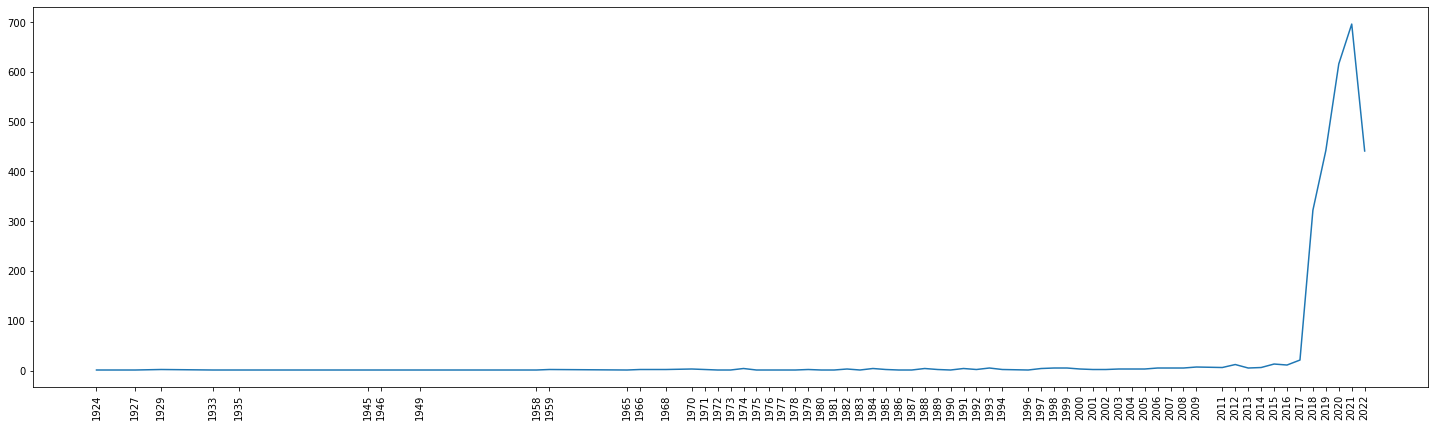

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,7))
plt.plot(data_peryear.Count)
plt.xticks(data_peryear.index.tolist(),rotation=90 ) # location, labels
plt.show()


In [16]:
#Question 2:Identify cities and states with highest number of mass shootings

In [17]:
#by city
data.groupby('City').sum().sort_values('Count', ascending=False)

,Dead,Injured,Total,Year,Count
City,,,,,
Chicago,118,881,999,399900,198
Philadelphia,45,369,414,173740,86
New York City,46,307,353,139298,69
Houston,68,186,254,107078,53
Baltimore,30,208,238,103026,51
...,...,...,...,...,...
Harris County,8,0,8,2015,1
Hartsville,3,6,9,2020,1
Haskell,0,4,4,2019,1


In [18]:
#by state
data.groupby('State').sum().sort_values('Count', ascending=False)

,Dead,Injured,Total,Year,Count
State,,,,,
Illinois,214,1239,1453,553356,274
California,472,985,1457,447774,222
Texas,441,956,1397,413898,205
Florida,229,608,837,276615,137
New York,118,567,686,254323,126
Pennsylvania,121,519,640,254437,126
Louisiana,102,511,613,244424,121
Ohio,133,427,560,199833,99
Georgia,89,365,454,185782,92


In [19]:
#Question 3:Year with highest number of victims
data_peryear = data.groupby('Year').sum().sort_values('Total', ascending=False)

In [20]:
data_peryear

,Dead,Injured,Total,Count
Year,,,,
2021,704,2843,3544,696
2020,522,2548,3070,616
2022,473,1842,2315,441
2019,524,1758,2283,442
2018,383,1291,1673,322
...,...,...,...,...
1978,5,0,5,1
1973,4,1,5,1
1958,0,4,4,1


In [21]:
#Question 4:Calculate the average number of victims per year
data_peryear['Total'].mean()

247.34375

In [ ]:
#Question 5:Create world cloud from description

In [ ]:
for i in data['Description']:
    print(i)
    print('.....')

In [22]:
text = ''.join(data['Description'])

In [24]:
#text preprocessing
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
def preprocess(line):
    review = re.sub('[^a-zA-Z]', ' ', line) #leave only characters from a to z
    review = review.lower() #lower the text
    review = review.split() #turn string into list of words
    #apply Stemming 
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] #delete stop words like I, and ,OR   review = ' '.join(review)
    #trun list into sentences
    return " ".join(review)


In [25]:
#pip install wordcloud


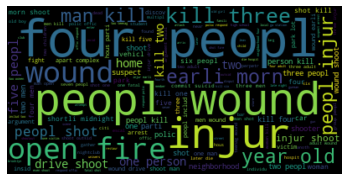

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(preprocess(text))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()